In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

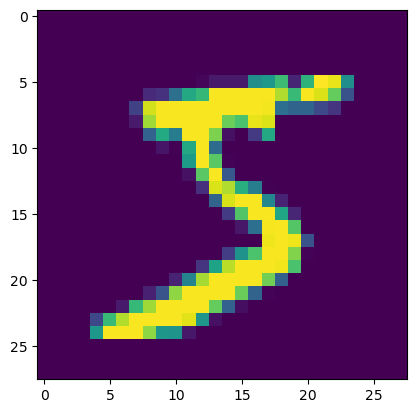

In [7]:
plt.imshow(X_train[0])

In [33]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])



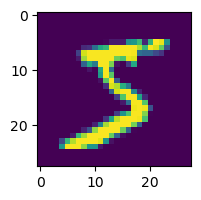

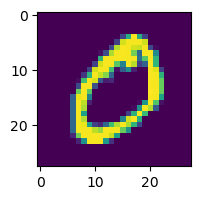

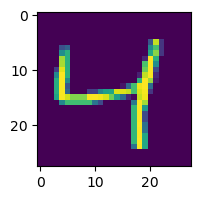

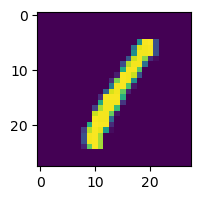

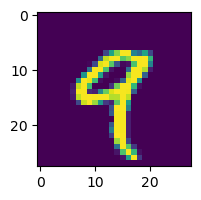

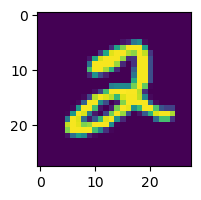

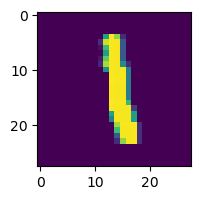

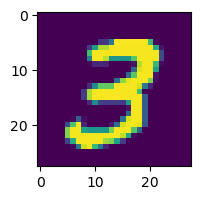

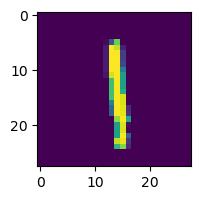

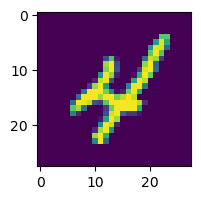

In [34]:
for i in range(10):
     plot_sample(X_train,y_train,i)

In [18]:
# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the images to (28, 28, 1) for Conv2D or (784,) for Dense layers
X_train = X_train.reshape((-1, 28, 28, 1))  # For Conv2D
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


2023-08-11 23:43:09.819042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 23:43:09.820094: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 2/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 3/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 4/5
938/938 [==============================] - 66s 70ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0377 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 11s 35ms/step - loss: 0.0421 - accuracy: 0.9884
Test accuracy: 0.9883999824523926


1/1 [==============================] - 0s 65ms/step


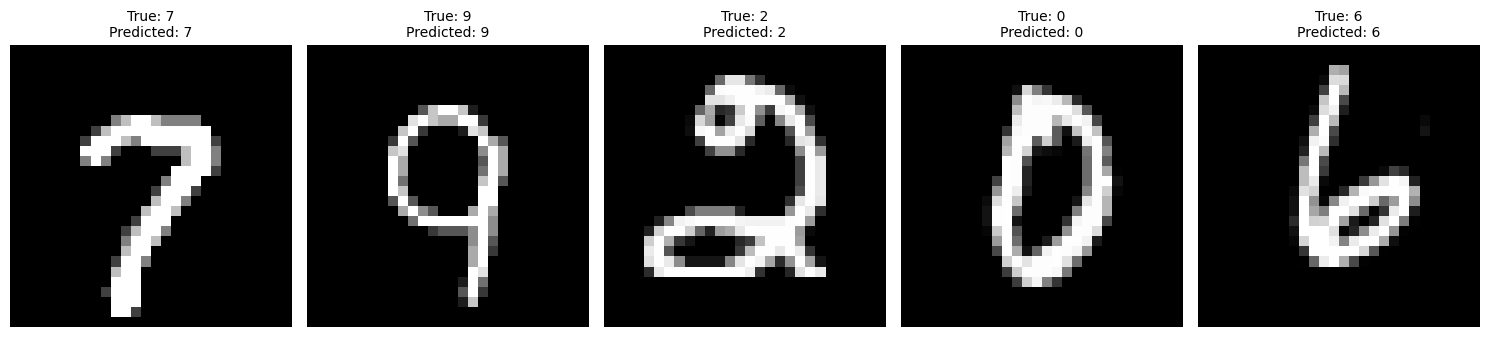

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Get a few random test samples
num_samples = 5
random_indices = np.random.randint(0, len(X_test), num_samples)
samples = X_test[random_indices]
true_labels = np.argmax(y_test[random_indices], axis=1)

# Predict the labels using the trained model
predicted_labels = model.predict(samples)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Plot the original and predicted images
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(samples[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 [==============================] - 8s 27ms/step


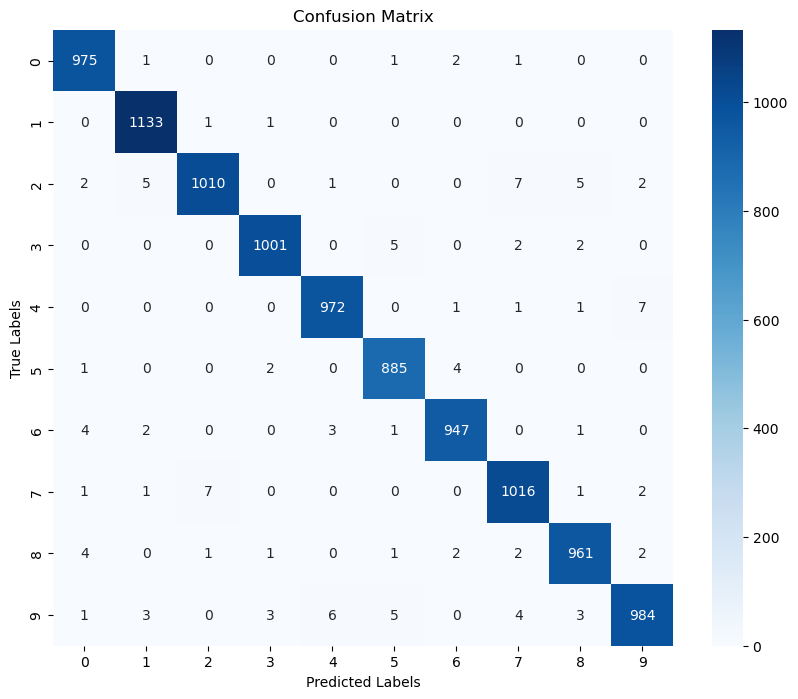

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the entire test set
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

313/313 [==============================] - 9s 30ms/step


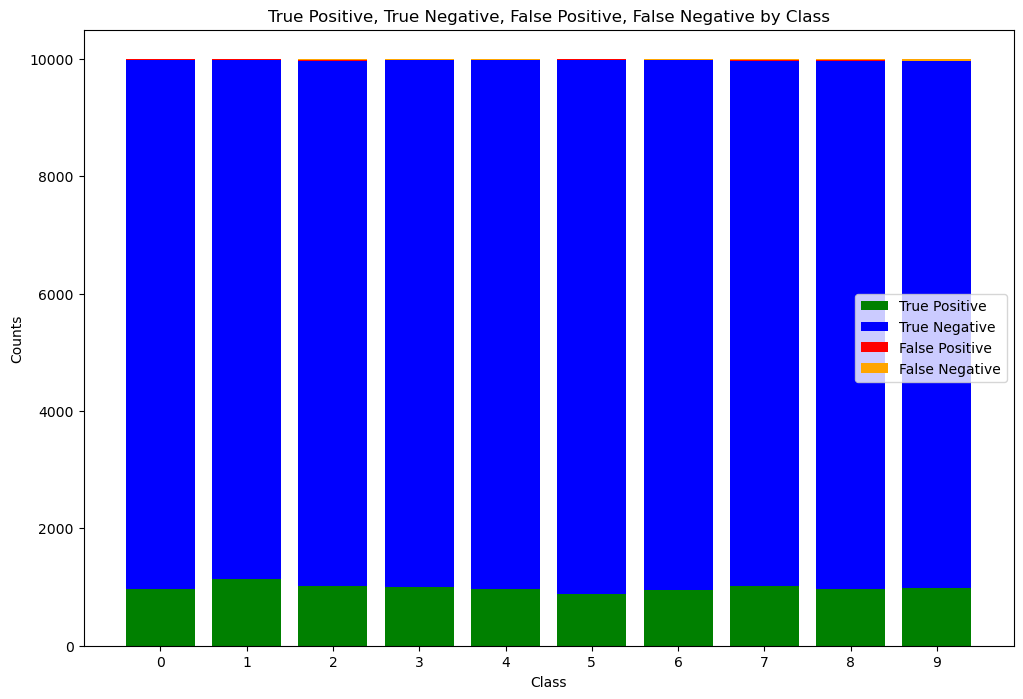

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the entire test set
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Define labels for the classes
class_labels = [str(i) for i in range(10)]

# Calculate TP, TN, FP, FN for each class
tp = np.diag(cm)
tn = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - tp)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp

# Plot TP, TN, FP, FN for each class
plt.figure(figsize=(12, 8))
plt.bar(class_labels, tp, label='True Positive', color='g')
plt.bar(class_labels, tn, label='True Negative', color='b', bottom=tp)
plt.bar(class_labels, fp, label='False Positive', color='r', bottom=tp + tn)
plt.bar(class_labels, fn, label='False Negative', color='orange', bottom=tp + tn + fp)
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('True Positive, True Negative, False Positive, False Negative by Class')
plt.legend()
plt.show()


313/313 [==============================] - 7s 21ms/step


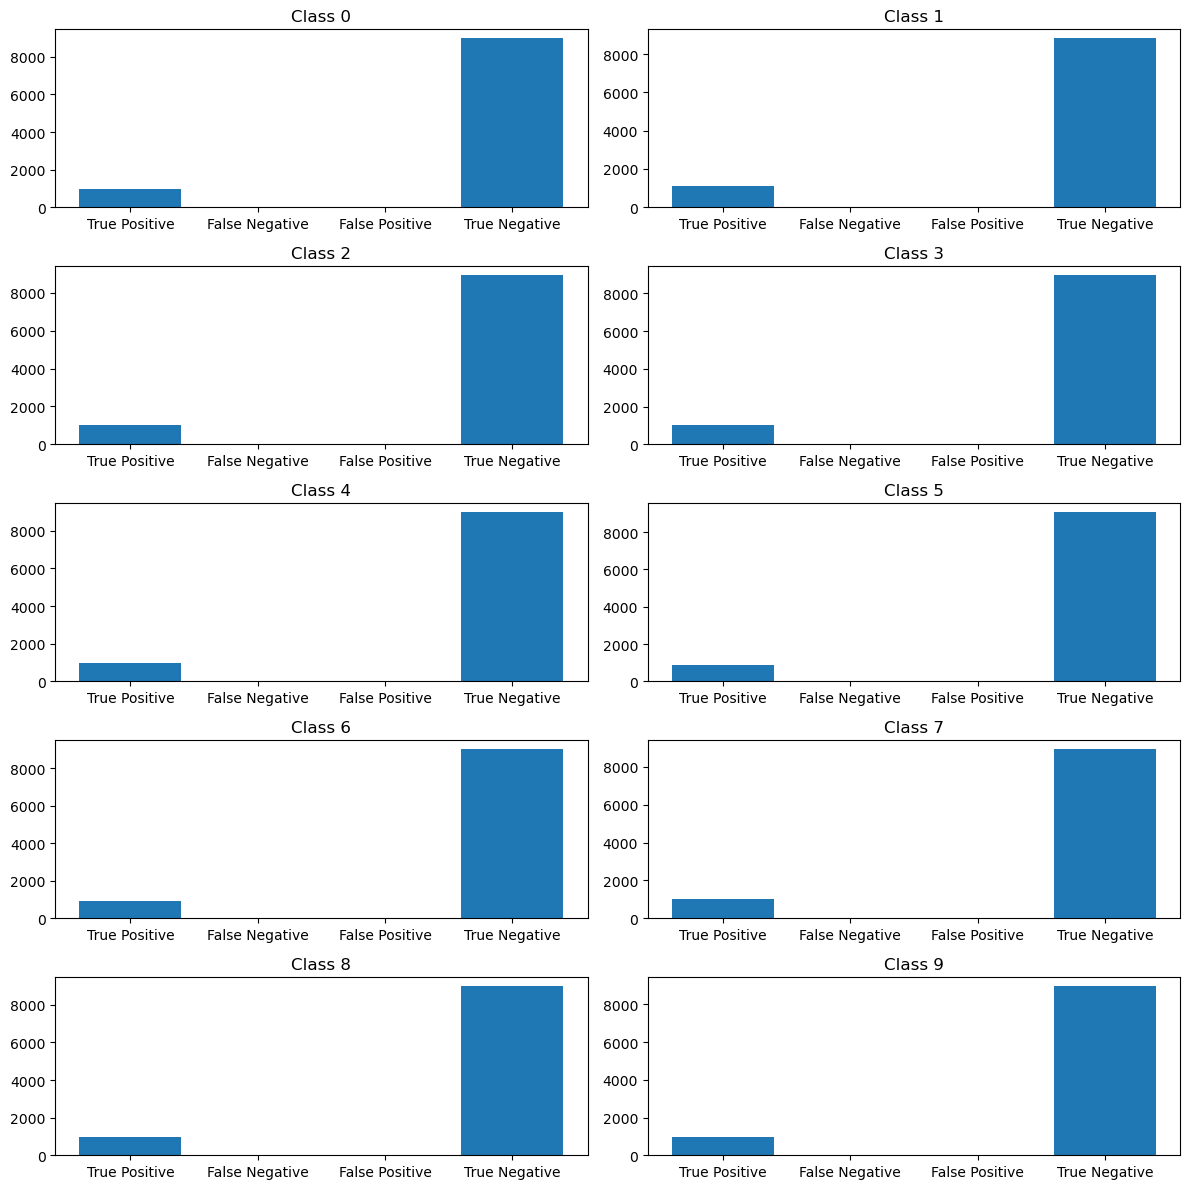

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the entire test set
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

# Define labels for the classes
class_labels = [str(i) for i in range(10)]

# Calculate TP, TN, FP, FN for each class
tp = np.diag(cm)
tn = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - tp)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp

# Plot TP, TN, FP, FN for each class in a 2x2 grid
plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.bar(['True Positive', 'False Negative', 'False Positive', 'True Negative'], [tp[i], fn[i], fp[i], tn[i]])
    plt.title(f'Class {i}')
    
plt.tight_layout()
plt.show()


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

Confusion matrix, without normalization
[[ 975    1    0    0    0    1    2    1    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   2    5 1010    0    1    0    0    7    5    2]
 [   0    0    0 1001    0    5    0    2    2    0]
 [   0    0    0    0  972    0    1    1    1    7]
 [   1    0    0    2    0  885    4    0    0    0]
 [   4    2    0    0    3    1  947    0    1    0]
 [   1    1    7    0    0    0    0 1016    1    2]
 [   4    0    1    1    0    1    2    2  961    2]
 [   1    3    0    3    6    5    0    4    3  984]]
Normalized confusion matrix
[[9.94897959e-01 1.02040816e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.02040816e-03 2.04081633e-03 1.02040816e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.98237885e-01 8.81057269e-04 8.81057269e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.93798450e-03 4.84496124e-03 9.78682171e-01 0.00000000e+00
  9.68992248e-04 0.000000

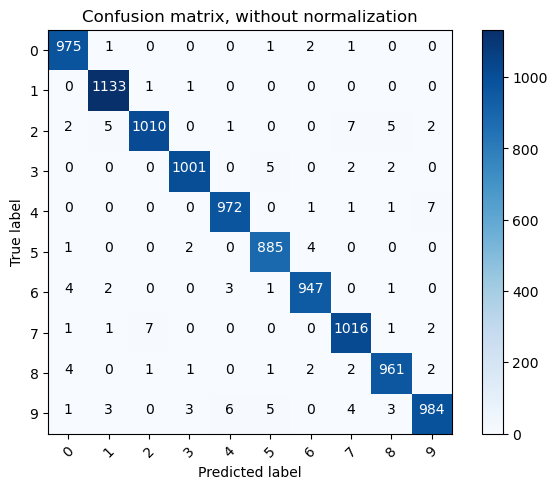

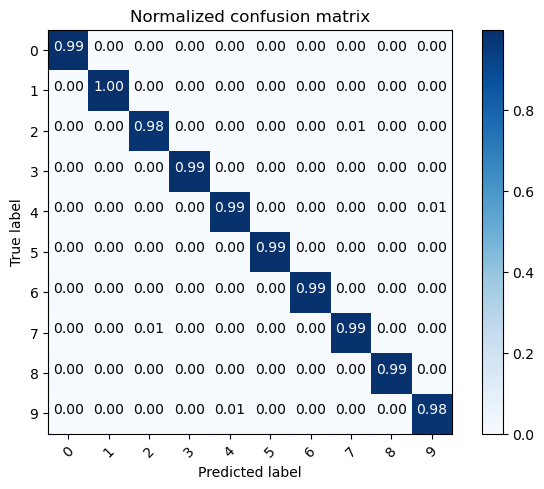

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example confusion matrix
cnf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)

class_names = [str(i) for i in range(10)]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

plt.show()